### Ejercicios del capitulo 4

En estos primeros ejemplos mostrados mas adelante vamos a simular el primer sistema cuantico descrito en la seccion 4.1 del libro "Quantum Computing for computer scientist".
### SECCIÓN 4.1. Ejercicios:

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [2]:
import numpy as np
# PUNTO 1,1
# Calcula la norma de un vector
def calcular_norma(vector):
    return np.linalg.norm(vector)

# Calcula la probabilidad en una posicion especifica
def calcular_probabilidad(estado, indice):
    numerador = calcular_norma(estado[indice]) ** 2
    denominador = calcular_norma(estado) ** 2
    return numerador / denominador

def main():
    estado = np.array([[4+2j], [-1+3j], [0-1j], [2-2j]])
    resultado = calcular_probabilidad(estado, 1)
    print("La probabilidad de encontrar la partícula en la posicion dada es:", resultado)
main()


ModuleNotFoundError: No module named 'numpy'

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo

In [3]:
import numpy as np

# Calcula la norma de un vector
def calcular_norma(vector):
    return np.linalg.norm(vector)

# Calcula el bra a partir de un ket
def calcular_bra(estado):
    for componente in estado:
        if isinstance(componente, list):
            componente[1] *= -1
        else:
            componente *= -1
    return estado

# Calcula la probabilidad de transición entre dos estados
def calcular_transicion(estado1, estado2):
    bra_estado2 = calcular_bra((estado2).T[0])
    norma1 = calcular_norma((estado1).T[0])
    norma2 = calcular_norma((estado2).T[0])
    norma_total = norma1 * norma2
    aux = (estado1).T
    probabilidad = np.dot(bra_estado2, (estado1).T[0])
    resultado = np.abs(probabilidad) ** 2
    return resultado

def main():
    estado1 = np.array([[2-1j], [3+0j]])
    estado2 = np.array([[0+2j], [1-1j]])
    transicion = calcular_transicion(estado1, estado2)
    print(f"La probabilidad de transitar del vector {estado1} al vector {estado2} es:", transicion)
main()


ModuleNotFoundError: No module named 'numpy'

### COMPLETE LOS RETOS DE PROGRAMACIÓN DEL CAPÍTULO 4 
Ahora daremos paso a completar algunos ejercicios visto en el capitulo 4 del libro antes visto y ver asi mismo nuevos conceptos y dar la solucion a dichos ejercicios.
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [2]:
import numpy as np

#Solucion

def transpuesta(ket1):
    traspuesta = ket1.T
    return traspuesta

def norma(a):
    norma = np.linalg.norm(a)
    return norma

def bra(ket):
    for num in ket:
        if isinstance(num, list):
            num[1] *= -1
        else:
            num *= -1
    return ket

def transition(ket1, ket2):
    braket2 = bra(transpuesta(ket2)[0])
    norm1 = norma(transpuesta(ket1)[0])
    norm2 = norma(transpuesta(ket2)[0])
    norm = norm1 * norm2
    aux = transpuesta(ket1)
    prob = np.dot(braket2, transpuesta(ket1)[0])
    ans = np.abs(prob) ** 2
    return ans

def main():
    ket1 = np.array([[0-1j], [1+0j]])
    ket2 = np.array([[1+0j], [0-1j]])
    transicion = transition(ket1, ket2)
    print(f"La probabilidad de transitar del vector {ket1} al vector {ket2} es:", transicion)
main()

La probabilidad de transitar del vector [[0.-1.j]
 [1.+0.j]] al vector [[1.+0.j]
 [0.-1.j]] es: 4.0


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [3]:
import numpy as np

def es_hermitiana(matriz):
    return np.allclose(matriz, matriz.conj().T)

def media_varianza_observable(matriz_observable, vector_ket):
    if not es_hermitiana(matriz_observable):
        print("La matriz no es hermitiana.")
        return None, None

    media = np.dot(vector_ket.conj().T, np.dot(matriz_observable, vector_ket)).real

    varianza = np.dot(vector_ket.conj().T, np.dot(matriz_observable ** 2, vector_ket)).real - media ** 2

    return media, varianza

def main():
    matriz_observable = np.array([[1, 0], [0, -1]])  
    vector_ket = np.array([[1], [0]])                

    media, varianza = media_varianza_observable(matriz_observable, vector_ket)

    if media is not None and varianza is not None:
        print("Media del observable:", media)
        print("Varianza del observable:", varianza)
main()

Media del observable: [[1]]
Varianza del observable: [[0]]


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.


In [4]:
import numpy as np

def eigenvalues_and_eigenvectors(observable):
    eigenvalues, eigenvectors = np.linalg.eigh(observable)
    return eigenvalues, eigenvectors
def transition_probabilities(observable, ket):
    eigenvalues, eigenvectors = eigenvalues_and_eigenvectors(observable)
    probabilities = np.abs(np.dot(eigenvectors.conj().T, ket)) ** 2
    return eigenvalues, probabilities
observable = np.array([[1, 2+1j], [2-1j, 3]])
eigenvalues, eigenvectors = eigenvalues_and_eigenvectors(observable)
print("Valores propios:", eigenvalues)
print("Vectores propios:")
print(eigenvectors)
ket = np.array([[1], [0]])
eigenvalues, probabilities = transition_probabilities(observable, ket)
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Probabilidad de transitar al vector propio {i+1}: {probabilities[i]}")

Valores propios: [-0.44948974  4.44948974]
Vectores propios:
[[-0.83912106+0.j         -0.54394472+0.j        ]
 [ 0.48651894-0.24325947j -0.75053269+0.37526634j]]
Probabilidad de transitar al vector propio 1: [0.70412415]
Probabilidad de transitar al vector propio 2: [0.29587585]


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicia

In [5]:
import numpy as np

def evolve_system(initial_state, evolution_matrices):
    final_state = initial_state
    for matrix in evolution_matrices:
        final_state = np.dot(matrix, final_state)
    return final_state
initial_state = np.array([[1], [0]])  # Estado inicial
evolution_matrices = [
    np.array([[0, 1], [1, 0]]),
    np.array([[1, 0], [0, -1]])
]
final_state = evolve_system(initial_state, evolution_matrices)
print("Estado final:")
print(final_state)

Estado final:
[[ 0]
 [-1]]


4.3.1 Encuentre todos los estados posibles a los que puede pasar el sistema descrito en el ejercicio 4.2.2 después de que se haya realizado una medición.

In [7]:
import numpy as np

def calculate(estado):
    operador = np.array([[0, 1], [1, 0]]) 
    return np.dot(operador, estado)
def CalculateStates():
    e0 = np.array([1, 0])
    result = np.random.choice([0, 1], p=[1, 0])  
    if result == 0:
        return [np.array([0, 1])]  
        newState = calculate(e0)
        return [newState] 
CalculateStates()

[array([0, 1])]

4.3.2 Realice los mismos cálculos que en el último ejemplo, utilizando el Ejercicio 4.3.1. Luego dibuje la distribución de probabilidad de los valores propios como en el ejemplo anterior.

Probabilidad p1: 0.5
Probabilidad p2: 0.5
Valor medio: 0.0


Text(0, 0.5, 'probabilidad')

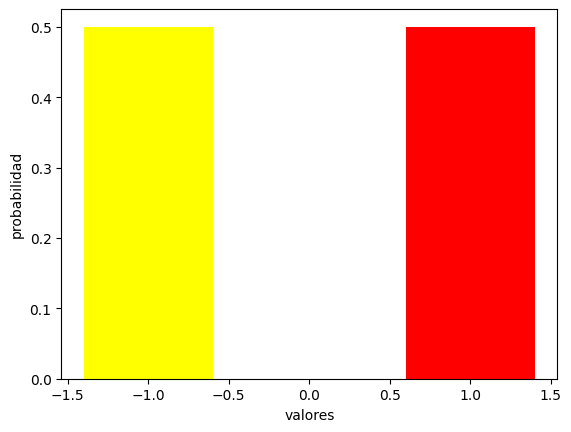

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_probabilidad(eigenvector):
    return np.linalg.norm(eigenvector)**2/2
def calcular_valor_medio(eigenvalues, probabilities):
    return sum(prob * eig_val for prob, eig_val in zip(probabilities, eigenvalues))
eigenvector1 = np.array([1, 0])
eigenvector2 = np.array([0, 1])
lambda1 = 1
lambda2 = -1
probabilidad1 = calcular_probabilidad(eigenvector1)
probabilidad2 = calcular_probabilidad(eigenvector2)
valor_medio = calcular_valor_medio([lambda1, lambda2], [probabilidad1, probabilidad2])
print("Probabilidad p1:", probabilidad1)
print("Probabilidad p2:", probabilidad2)
print("Valor medio:", valor_medio)
eigenvalues = [lambda1, lambda2]
probabilities = [probabilidad1, probabilidad2]
plt.bar(eigenvalues, probabilities, color=['red', 'yellow'])
plt.xlabel('valores')
plt.ylabel('probabilidad')

4.4.1 Exercise 4.4.1 Verifique que:
$$ 
    \begin{bmatrix} 0 && 1 \\
                   1 && 0 \\
    \end{bmatrix}
    \begin{bmatrix}  √2/2 && √2/2 \\
                   √2/2 && -√2/2 \\
    \end{bmatrix}$$
son matrices unitarias. Multiplícalos y verifica que su producto también sea unitario.

In [10]:
import numpy as np

def is_unitary(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        return False
    identity = np.eye(matrix.shape[0])
    product = np.dot(matrix, matrix.conj().T)
    return np.allclose(product, identity)
    
matrix1 = np.array([[0, 1], [1, 0]])
matrix2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])
producto = np.dot(matrix1,matrix2)
print("¿La matriz 1 es unitaria?", is_unitary(matrix1))
print("¿La matriz 2 es unitaria?", is_unitary(matrix2))
print("¿El producto entre ellas es unitario?", is_unitary(producto))

¿La matriz 1 es unitaria? True
¿La matriz 2 es unitaria? True
¿El producto entre ellas es unitario? True


4.4.2 Determinar el estado del sistema después de tres pasos de tiempo. ¿Cuál es la probabilidad de que la bola cuántica se encuentre en el punto 3?

In [12]:
import numpy as np

m1 = np.array([[0,1/np.sqrt(2),1/np.sqrt(2),0], 
               [1j/np.sqrt(2),0,0,1/np.sqrt(2)], 
               [1/np.sqrt(2),0,0,1j/np.sqrt(2)],
               [0,1/np.sqrt(2),-1/np.sqrt(2),0]])

v1 = np.array([[1], [0], [0], [0]])
click1 = np.dot(m1, v1)
click2 = np.dot(m1, click1)
click3 = np.dot(m1, click2)

print("Resultado despues de un click: ", click1)
print("Resultado despues de dos click: ", click2)
print("Resultado despues de tres click ", click3)
norma = np.linalg.norm(click3)
probabilidad = (click3[2]*(np.conj(click3[2])))/(norma**2)
print("La probablidad es",probabilidad)

Resultado despues de un click:  [[0.        +0.j        ]
 [0.        +0.70710678j]
 [0.70710678+0.j        ]
 [0.        +0.j        ]]
Resultado despues de dos click:  [[ 0.5+0.5j]
 [ 0. +0.j ]
 [ 0. +0.j ]
 [-0.5+0.5j]]
Resultado despues de tres click  [[ 0.        +0.j        ]
 [-0.70710678+0.70710678j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
La probablidad es [0.+0.j]


4.5.2

El vector de estado genérico para un sistema de dos partículas con espín se puede representar como el producto tensorial de los vectores de estado de cada partícula. 
Si cada partícula puede estar en una superposición de sus estados de espín, el vector de estado genérico para el sistema se puede escribir como:
$$ |\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle $$

Si tenemos $n$ partículas, podemos generalizar esto a:

$$ |\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle \otimes \ldots \otimes |\psi_n\rangle $$

Esto representa el estado de un sistema de \( n \) partículas, donde cada partícula puede estar en una superposición de sus estados de espín.
Cuando el estado del sistema no puede expresarse como un simple producto tensorial de los estados individuales de sus constituyentes, se produce el entrelazamiento. Esto implica que los estados de cada partícula están conectados de tal manera que la medición de una partícula puede afectar inmediatamente el estado de otra partícula, independientemente de la distancia entre ellas. El entrelazamiento es un componente esencial de la mecánica cuántica y es esencial para una variedad de procesos y usos cuánticos, como la computación cuántica, la comunicación cuántica y la criptografía cuántica.

4.5.3
El estado 
$$ |\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle $$

se puede simplificar de la siguiente manera:

$$ |\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle = (|x_0\rangle + |x_1\rangle) \otimes |y_1\rangle $$

Como $$ |x_0\rangle + |x_1\rangle $$ es simplemente otro vector de estado en el espacio del primer sistema, este estado puede escribirse como el producto de dos estados individuales, uno para cada subsistema:

$$ |\phi\rangle = (|x_0\rangle + |x_1\rangle) \otimes |y_1\rangle = |\psi\rangle \otimes |y_1\rangle $$
Por lo tanto, este estado es separable.